# <font color='red'> <div align='center'> Lojistik_Regresyon_ile_Siniflandirma


##### Bu ödevde, modelinizi kullanarak Titanic faciasında hayatta kalma durumunu tahmin edeceksiniz. Bu ödevi tamamlamak için, aşağıdaki görevlerin çözümlerini içeren bir Jupyter not defterini link olarak gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

##### Titanic verilerini Kaggle'dan indirin. Buradaki train.csv dosyasındaki veriler ihtiyacınızı görecektir.

##### Verilerinizi eğitim ve test kümelerine ayırın.

##### Modelinizi oluşturarak ayırdığınız test kümesindeki verilere göre hayatta kalma durumlarını tahmin edin.

##### Modelinizin performansı tatmin edici mi? Açıklayın.

##### Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.

##### Lojistik Regresyon'un avantaj ve dezavantajlarını araştırın ve mentörünüzle tartışın.

In [1]:
#Titanic verilerini Kaggle'dan indirin. Buradaki train.csv dosyasındaki veriler ihtiyacınızı görecektir.
import pandas as pd
titanic = pd.read_csv('data/titanic_data.csv') # id olsaydi "index_col=0" ekleyebilirdim.

In [2]:
titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#titanic['Target']= titanic['Survived'].map({0:'Not Survived', 1:'Survived'}) *** Ileride bu sekilde de yapilabilir.
#titanic['Target'].head(15) *** 

In [4]:
titanic.drop('Cabin', inplace=True, axis=1)

In [5]:
total_missing_values = titanic.isnull().sum()
missing_values_per = titanic.isnull().sum()/titanic.isnull().count()
null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc'])
null_values = null_values.sort_values('total_null', ascending=False)
null_values

,total_null,total_null_perc
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


In [6]:
titanic['Age']= titanic['Age'].fillna(titanic['Age'].mean())
titanic['Embarked']= titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [7]:
titanic[titanic['Ticket'] == 113572]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [8]:
null_values

,total_null,total_null_perc
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


In [10]:
titanic[titanic['PassengerId'] == 62]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,S


In [11]:
titanic['Embarked']= titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [12]:
titanic[titanic['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [13]:
total_missing_values = titanic.isnull().sum()
missing_values_per = titanic.isnull().sum()/titanic.isnull().count()
null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc'])
null_values = null_values.sort_values('total_null', ascending=False)
null_values

,total_null,total_null_perc
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
corr_matrix = titanic.corr()
corr_list =  corr_matrix.Survived.abs().sort_values(ascending=False).index[1:]

Text(0.5, 1.0, 'Correlation Matrix')

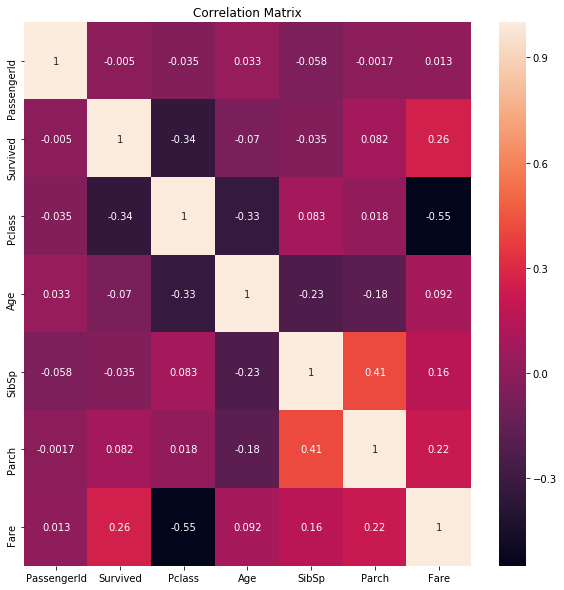

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')

C:\Users\ece-yusuf-sekoya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 10)

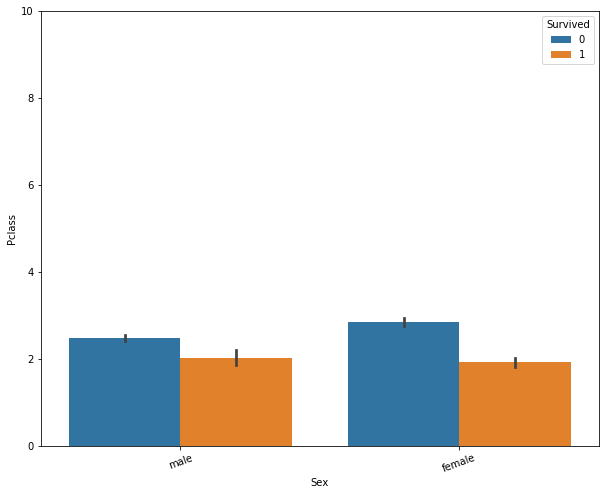

In [20]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.barplot(x="Sex", y="Pclass", hue="Survived", data=titanic)
plt.xticks(rotation=20)
plt.ylim((0,10))

In [22]:
X = titanic[corr_list]
y = titanic.iloc[:,1].values

In [31]:
X = titanic[corr_list]
y = titanic.Survived

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(X, s=100, hue = y, palette = 'viridis')
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.title("boyutlar", fontdict = baslik_font)
plt.xlabel("survived", fontdict = eksen_font)
plt.ylabel("not survived", fontdict = eksen_font)
plt.show()

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

<Figure size 720x432 with 0 Axes>

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [34]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [35]:
log_reg.fit(X_eğitim, y_eğitim)

C:\Users\ece-yusuf-sekoya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### One vs Rest

In [36]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')


One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.71
Modelin test verisindeki doğruluğu   : 0.70


In [37]:
y_pred = log_reg.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[96, 17],
       [36, 30]], dtype=int64)

In [39]:
print("Doğruluk Oranı: %",((96+30) /180)*100)

Doğruluk Oranı: % 70.0


#### Multinomial (Softmax)

In [40]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)
egitim_dogruluk = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.71
Modelin test verisindeki doğruluğu   : 0.70


C:\Users\ece-yusuf-sekoya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [41]:
y_pred = log_reg_mnm.predict(X_test)

In [42]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[100,  13],
       [ 40,  26]], dtype=int64)

In [43]:
print("Doğruluk Oranı: %",((126+30) /179)*100)

Doğruluk Oranı: % 87.15083798882681


In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(X[:,0], X[:,1], s=100, hue = y, palette = 'viridis')
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.title("boyutlar", fontdict = baslik_font)
plt.xlabel("survived", fontdict = eksen_font)
plt.ylabel("not survived", fontdict = eksen_font)
plt.show()

TypeError: unhashable type: 'slice'

<Figure size 720x432 with 0 Axes>

NameError: name 'baslik_font' is not defined

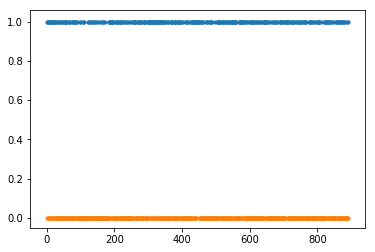

In [45]:
# filter out the applicants that got admitted
survived     = titanic.loc[y == 1]

# filter out the applicants that din't get admission
not_survived = titanic.loc[y == 0]

# plots
plt.scatter(survived.iloc[:, 0], survived.iloc[:, 1], s=10, label='survived')
plt.scatter(not_survived.iloc[:, 0], not_survived.iloc[:, 1], s=10, label='not_survived')
plt.title("survived or not", fontdict = baslik_font)
plt.xlabel("survived", fontdict = eksen_font)
plt.ylabel("not_survived", fontdict = eksen_font)
plt.legend()
plt.show()